# 2do Examen curso Fundamentos de Data Science : Hotel Bookings 

## **Requisitos:**

Tu tarea es limpiar y explorar un dataset que contiene información sobre los salarios en el campo de la ciencia de datos para el año 2023. Este análisis es crucial para entender las tendencias salariales y los factores que influyen en las diferencias de salarios en esta industria.

## **Configuración**

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
from IPython.display import HTML, Image
import utils
from collections import Counter

path = '../data/kaggle/hotel-booking/hotel_booking.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.info()

(119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  mea

## Limpieza de datos con Python:

### **Verificación y ajuste de tipos de datos** 

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [2]:
# Convert 'reservation_status_date' to a datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')
# Combine year, month, and day to create a full date
df['date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + ' ' + 
    df['arrival_date_month'] + ' ' + 
    df['arrival_date_day_of_month'].astype(str), 
    format='%Y %B %d'
)

# Display the result
df[['arrival_date_month', 'arrival_date_year', 'arrival_date_day_of_month', 'date']].head()

,arrival_date_month,arrival_date_year,arrival_date_day_of_month,date
0,July,2015,1,2015-07-01
1,July,2015,1,2015-07-01
2,July,2015,1,2015-07-01
3,July,2015,1,2015-07-01
4,July,2015,1,2015-07-01


In [3]:
# Identify categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:", categorical_variables)
df[categorical_variables] = df[categorical_variables].astype('category')
df.info()

Categorical Variables: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  category      
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  category      
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null 

### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [4]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.loc[duplicados].head(3)

Número de registros duplicados: 31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07,2015-07-01
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07,2015-07-02


In [5]:
df.iloc[4:6].T

,4,5
hotel,Resort Hotel,Resort Hotel
is_canceled,0,0
lead_time,14,14
arrival_date_year,2015,2015
arrival_date_month,July,July
arrival_date_week_number,27,27
arrival_date_day_of_month,1,1
stays_in_weekend_nights,0,0
stays_in_week_nights,2,2
adults,2,2


In [6]:
df.iloc[21:23].T

,21,22
hotel,Resort Hotel,Resort Hotel
is_canceled,0,0
lead_time,72,72
arrival_date_year,2015,2015
arrival_date_month,July,July
arrival_date_week_number,27,27
arrival_date_day_of_month,1,1
stays_in_weekend_nights,2,2
stays_in_week_nights,4,4
adults,2,2


In [7]:
df.drop_duplicates(inplace=True)
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
print(df.shape)

Número de registros duplicados: 0
(87396, 33)


### **Consistencia en valores categóricos**

Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’)


In [8]:
categorical_variables

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [9]:
df.hotel.unique()

['Resort Hotel', 'City Hotel']
Categories (2, object): ['City Hotel', 'Resort Hotel']

In [10]:
list(df.arrival_date_month.unique())

['July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June']

In [11]:
df.meal.unique()

['BB', 'FB', 'HB', 'SC', 'Undefined']
Categories (5, object): ['BB', 'FB', 'HB', 'SC', 'Undefined']

In [12]:
df.country.unique()

['PRT', 'GBR', 'USA', 'ESP', 'IRL', ..., 'KIR', 'SDN', 'ATF', 'SLE', 'LAO']
Length: 178
Categories (177, object): ['ABW', 'AGO', 'AIA', 'ALB', ..., 'VNM', 'ZAF', 'ZMB', 'ZWE']

In [13]:
df.market_segment.unique()

['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']
Categories (8, object): ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA', 'Undefined']

In [14]:
df.distribution_channel.unique()

['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']
Categories (5, object): ['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined']

In [15]:
df.reserved_room_type.unique()

['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B']
Categories (10, object): ['A', 'B', 'C', 'D', ..., 'G', 'H', 'L', 'P']

In [16]:
list(df.assigned_room_type.unique())

['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K']

In [17]:
df.deposit_type.unique()

['No Deposit', 'Refundable', 'Non Refund']
Categories (3, object): ['No Deposit', 'Non Refund', 'Refundable']

In [18]:
df.customer_type.unique()

['Transient', 'Contract', 'Transient-Party', 'Group']
Categories (4, object): ['Contract', 'Group', 'Transient', 'Transient-Party']

In [19]:
df.reservation_status.unique()

['Check-Out', 'Canceled', 'No-Show']
Categories (3, object): ['Canceled', 'Check-Out', 'No-Show']

In [20]:
# Convert all categorical variables to lowercase and strip whitespace
df[categorical_variables] = df[categorical_variables].apply(lambda x: x.str.lower().str.strip())

### **Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato**

In [21]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
company,5259,82137,93.98
agent,75203,12193,13.95
country,86944,452,0.52
hotel,87396,0,0.00
reserved_room_type,87396,0,0.00
assigned_room_type,87396,0,0.00
booking_changes,87396,0,0.00
deposit_type,87396,0,0.00
days_in_waiting_list,87396,0,0.00
previous_cancellations,87396,0,0.00


In [22]:
# Elimina la variable 'company' ya que tiene una cantidad de NA's que la hace inutil
df.drop(columns=['company'],inplace=True)
# reeemplazamos los valores faltantes de country y agent con "no identificado"
df[['country', 'agent']] = df[['country', 'agent']].fillna("no identificado")
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
hotel,87396,0,0.0
is_canceled,87396,0,0.0
reservation_status_date,87396,0,0.0
reservation_status,87396,0,0.0
total_of_special_requests,87396,0,0.0
required_car_parking_spaces,87396,0,0.0
adr,87396,0,0.0
customer_type,87396,0,0.0
days_in_waiting_list,87396,0,0.0
agent,87396,0,0.0


### **Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).**

In [23]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
is_canceled,0.0,0.000000,0.00,1.0
lead_time,2396.0,2.741544,0.00,296.0
arrival_date_year,0.0,0.000000,2015.00,2017.0
arrival_date_week_number,0.0,0.000000,1.00,53.0
arrival_date_day_of_month,0.0,0.000000,1.00,31.0
stays_in_weekend_nights,220.0,0.251728,0.00,5.0
stays_in_week_nights,1531.0,1.751796,0.00,8.0
adults,22899.0,26.201428,2.00,2.0
children,8364.0,9.570232,0.00,0.0
babies,914.0,1.045814,0.00,0.0


In [24]:
df[numerical_columns].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


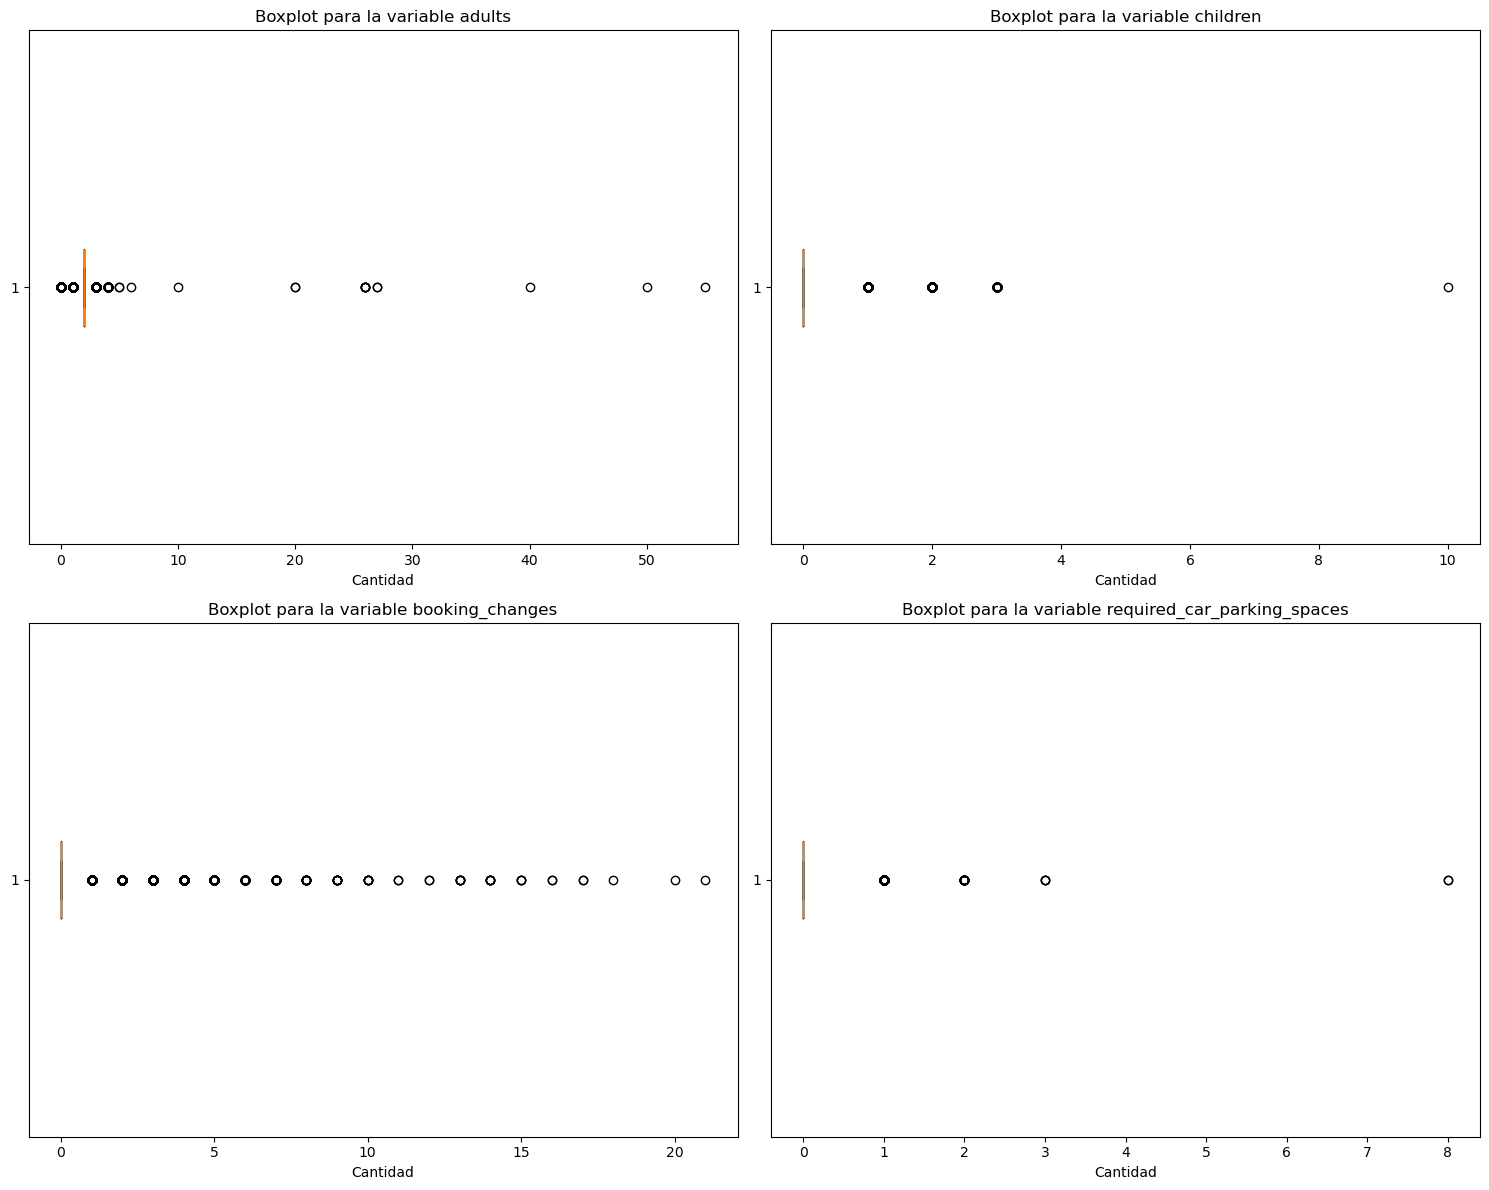

In [25]:
# Identify columns with more than 5% of outliers
columns_with_outliers = outliers_summary.columns[outliers_summary.loc['Percentage of Outliers'] > 5]
# Filter the original DataFrame to include only these columns
df_outliers = df[columns_with_outliers]
# Create separate box plots for each column with more than 5% outliers in a 2x2 grid
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df_outliers[column].dropna(), vert=False)
    plt.title(f"Boxplot para la variable {column}")
    plt.xlabel("Cantidad")
plt.tight_layout()
plt.show()


## **Exploración de datos con Python**


### **Visualizaciones exploratorias univariadas**

Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código

#### Histograma de cantidad de adultos en la reserva

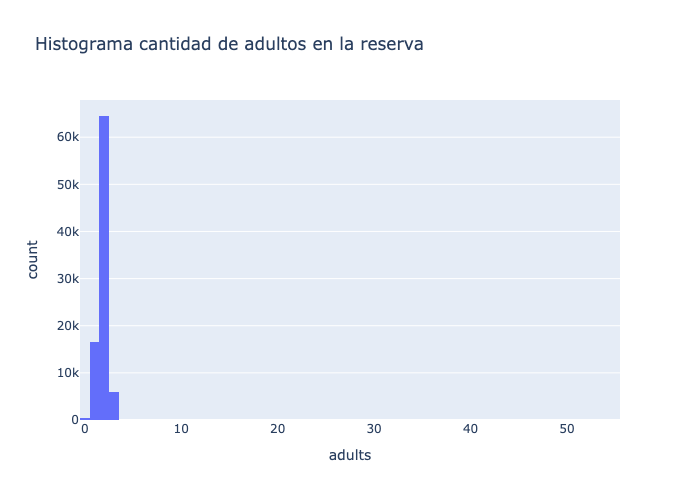

In [26]:
# Generate the figure
fig = px.histogram(df, x='adults', nbins=100, title='Histograma cantidad de adultos en la reserva')
# Display the figure as HTML to ensure compatibility with Quarto rendering
# HTML(fig.to_html())
fig.write_image("../data/kaggle/hotel-booking/histogram_adults.png")
Image("../data/kaggle/hotel-booking/histogram_adults.png")
#fig.show()

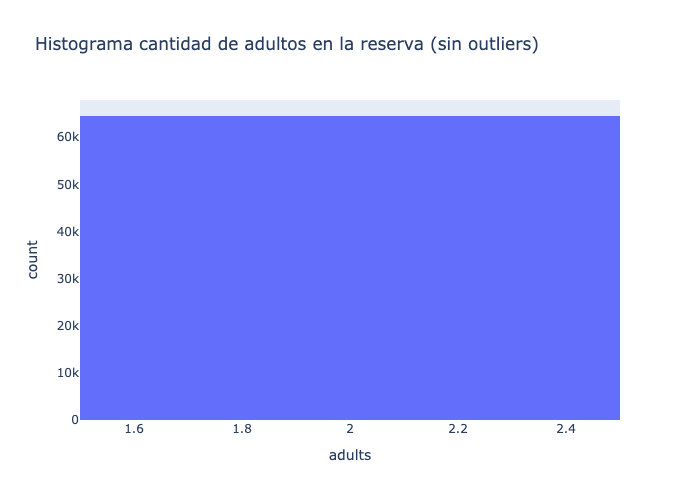

In [27]:
# Calculate IQR to filter outliers
Q1 = df['adults'].quantile(0.25)
Q3 = df['adults'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
df_no_outliers = df[(df['adults'] >= lower_bound) & (df['adults'] <= upper_bound)]

# Generate the histogram without outliers
fig = px.histogram(df_no_outliers, x='adults', nbins=10, title='Histograma cantidad de adultos en la reserva (sin outliers)')

# Save the figure as an image for Quarto compatibility
fig.write_image("../data/kaggle/hotel-booking/histogram_adults_no_outliers.png")
Image("../data/kaggle/hotel-booking/histogram_adults_no_outliers.png")

#### Histograma de cambios en la reserva

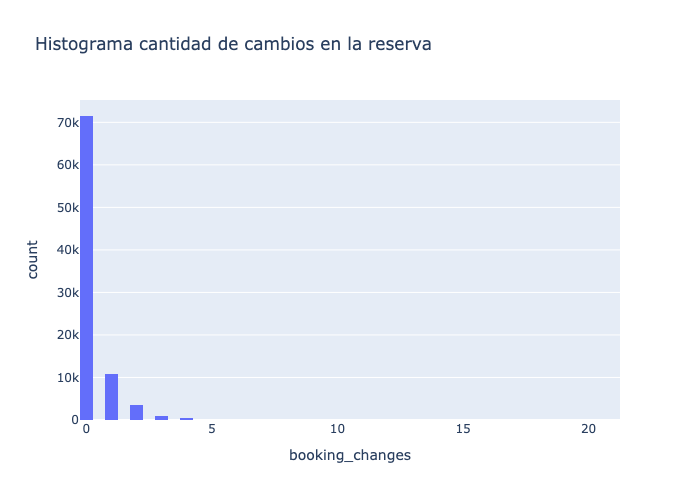

In [28]:
# Generate the figure
fig = px.histogram(df, x='booking_changes', nbins=50, title='Histograma cantidad de cambios en la reserva')
# Display the figure as HTML to ensure compatibility with Quarto rendering
# HTML(fig.to_html())
fig.write_image("../data/kaggle/hotel-booking/histogram_booking_changes.png")
Image("../data/kaggle/hotel-booking/histogram_booking_changes.png")
#fig.show()

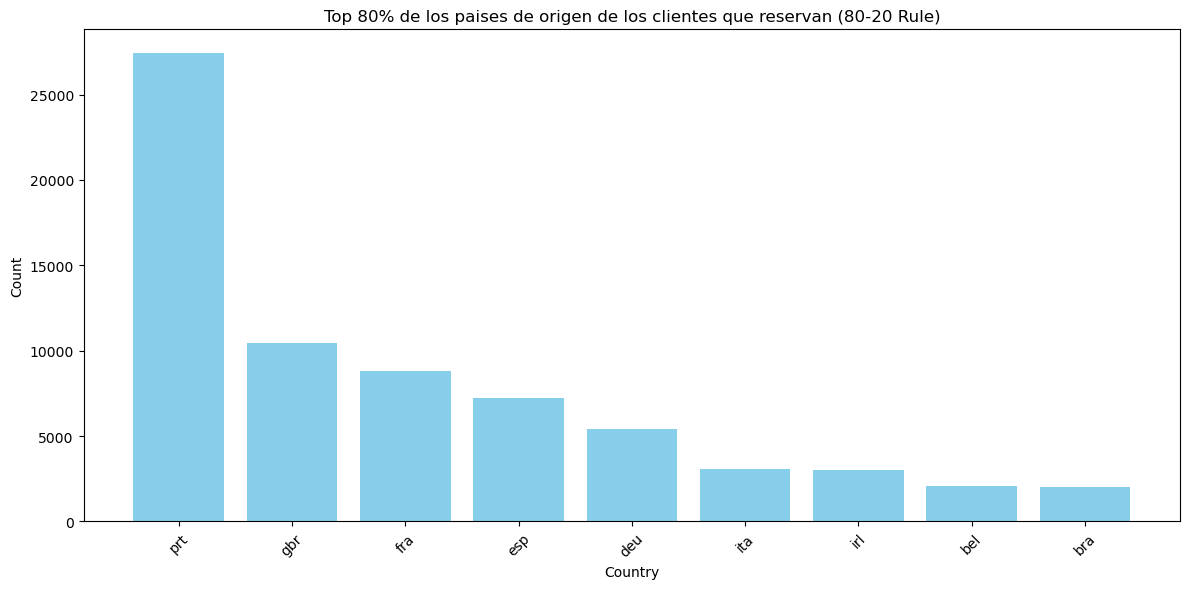

In [29]:
# Count unique values in the 'country' column
country_counts = Counter(df['country'])

# Convert the Counter to a DataFrame for easier manipulation
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

# Calculate cumulative percentage
country_df['Cumulative Percentage'] = country_df['Count'].cumsum() / country_df['Count'].sum() * 100

# Filter to include only the top countries making up 80% of the total
top_80_df = country_df[country_df['Cumulative Percentage'] <= 80]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_80_df['Country'], top_80_df['Count'], color='skyblue')
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 80% de los paises de origen de los clientes que reservan (80-20 Rule)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Visualizaciones exploratorias multivariadas**

Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código

In [30]:
df.iloc[4:6].T

,4,6
hotel,resort hotel,resort hotel
is_canceled,0,0
lead_time,14,0
arrival_date_year,2015,2015
arrival_date_month,july,july
arrival_date_week_number,27,27
arrival_date_day_of_month,1,1
stays_in_weekend_nights,0,0
stays_in_week_nights,2,2
adults,2,2


In [31]:
numerical_columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [32]:
booking_behaviour_columns = ['lead_time','stays_in_weekend_nights', 'stays_in_week_nights','days_in_waiting_list'] 
family_columns = ['adults', 'children','babies','required_car_parking_spaces','total_of_special_requests']
booking_history = ['is_repeated_guest', 'previous_cancellations','previous_bookings_not_canceled', 'booking_changes']

In [33]:
df.groupby(['arrival_date_year','is_canceled'])[family_columns].describe().T

arrival_date_year                          2015                       2016  \
is_canceled                                   0            1             0   
adults                      count  10609.000000  2704.000000  31183.000000   
                            mean       1.797153     1.975962      1.846070   
                            std        0.488699     2.109247      0.527881   
                            min        0.000000     0.000000      0.000000   
                            25%        2.000000     2.000000      2.000000   
                            50%        2.000000     2.000000      2.000000   
                            75%        2.000000     2.000000      2.000000   
                            max        4.000000    55.000000      4.000000   
children                    count  10609.000000  2700.000000  31183.000000   
                            mean       0.096145     0.118148      0.118077   
                            std        0.383966     0.474356      0.416347   
                            min        0.000000     0.000000      0.000000   
                            25%        0.000000     0.000000      0.000000   
                            50%        0.000000     0.000000      0.000000   
                            75%        0.000000     0.000000      0.000000   
                            max        3.000000    10.000000      3.000000   
babies                      count  10609.000000  2704.000000  31183.000000   
                            mean       0.017061     0.015163      0.011705   
                            std        0.154712     0.122222      0.121818   
                            min        0.000000     0.000000      0.000000   
                            25%        0.000000     0.000000      0.000000   
                            50%        0.000000     0.000000      0.000000   
                            75%        0.000000     0.000000      0.000000   
                            max        9.000000     1.000000     10.000000   
required_car_parking_spaces count  10609.000000  2704.000000  31183.000000   
                            mean       0.125460     0.000000      0.122599   
                            std        0.332391     0.000000      0.329348   
                            min        0.000000     0.000000      0.000000   
                            25%        0.000000     0.000000      0.000000   
                            50%        0.000000     0.000000      0.000000   
                            75%        0.000000     0.000000      0.000000   
                            max        2.000000     0.000000      3.000000   
total_of_special_requests   count  10609.000000  2704.000000  31183.000000   
                            mean       0.644264     0.629438      0.734567   
                            std        0.825422     0.812567      0.811809   
                            min        0.000000     0.000000      0.000000   
                            25%        0.000000     0.000000      0.000000   
                            50%        0.000000     0.000000      1.000000   
                            75%        1.000000     1.000000      1.000000   
                            max        5.000000     4.000000      5.000000   

arrival_date_year                                        2017                
is_canceled                                   1             0             1  
adults                      count  11208.000000  21579.000000  10113.000000  
                            mean       1.929604      1.864730      1.987145  
                            std        0.493507      0.515949      0.476954  
                            min        0.000000      0.000000      0.000000  
                            25%        2.000000      2.000000      2.000000  
                            50%        2.000000      2.000000      2.000000  
                            75%        2.000000      2.000000      2.000000  
                     

In [34]:
grouped = df.groupby(['arrival_date_year','is_canceled'])['required_car_parking_spaces'].describe().reset_index()
grouped 

,arrival_date_year,is_canceled,count,mean,std,min,25%,50%,75%,max
0,2015,0,10609.0,0.125460,0.332391,0.0,0.0,0.0,0.0,2.0
1,2015,1,2704.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,2016,0,31183.0,0.122599,0.329348,0.0,0.0,0.0,0.0,3.0
3,2016,1,11208.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,2017,0,21579.0,0.102275,0.314278,0.0,0.0,0.0,0.0,8.0
5,2017,1,10113.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [35]:
# Convert 'is_canceled' to a categorical label (e.g., "Canceled" or "Not Canceled")
grouped['cancel_status'] = grouped['is_canceled'].apply(lambda x: 'Canceled' if x == 1 else 'Not Canceled')

# Create the bar plot with separate bars for each year and cancellation status
fig = px.bar(
    grouped,
    x='arrival_date_year', 
    y='mean', 
    color='cancel_status',  # Different colors for canceled and not canceled
    title='Cantidad de estacionamientos requeridos por año de la reserva y estado de cancelación',
    barmode='group',  # Groups by year and cancellation status
    labels={'mean': 'Cantidad Promedio', 'arrival_date_year': 'Año de la Reserva', 'cancel_status': 'Estado de Cancelación'}
)

fig.show()


In [36]:
grouped = df.groupby(['arrival_date_year','is_canceled'])['children'].describe().reset_index()
grouped 

,arrival_date_year,is_canceled,count,mean,std,min,25%,50%,75%,max
0,2015,0,10609.0,0.096145,0.383966,0.0,0.0,0.0,0.0,3.0
1,2015,1,2700.0,0.118148,0.474356,0.0,0.0,0.0,0.0,10.0
2,2016,0,31183.0,0.118077,0.416347,0.0,0.0,0.0,0.0,3.0
3,2016,1,11208.0,0.185849,0.525590,0.0,0.0,0.0,0.0,3.0
4,2017,0,21579.0,0.133695,0.442928,0.0,0.0,0.0,0.0,3.0
5,2017,1,10113.0,0.210323,0.557746,0.0,0.0,0.0,0.0,3.0


In [37]:
# Convert 'is_canceled' to a categorical label (e.g., "Canceled" or "Not Canceled")
grouped['cancel_status'] = grouped['is_canceled'].apply(lambda x: 'Canceled' if x == 1 else 'Not Canceled')
# Create the bar plot with separate bars for each year and cancellation status
fig = px.bar(
    grouped,
    x='arrival_date_year', 
    y='mean', 
    color='cancel_status',  # Different colors for canceled and not canceled
    title='Cantidad de niños en la reserva y estado de cancelación',
    barmode='group',  # Groups by year and cancellation status
    labels={'mean': 'Cantidad Promedio',  'arrival_date_year': 'Año de la Reserva', 'cancel_status': 'Estado de Cancelación'}
)

fig.show()

In [38]:
df.groupby(['arrival_date_year','is_canceled'])[booking_behaviour_columns].describe().T

arrival_date_year                      2015                       2016  \
is_canceled                               0            1             0   
lead_time               count  10609.000000  2704.000000  31183.000000   
                        mean      50.396550    91.242604     69.520091   
                        std       65.472486    89.188363     80.844854   
                        min        0.000000     0.000000      0.000000   
                        25%        4.000000    23.000000      6.000000   
                        50%       24.000000    65.000000     38.000000   
                        75%       72.000000   123.000000    109.000000   
                        max      737.000000   414.000000    709.000000   
stays_in_weekend_nights count  10609.000000  2704.000000  31183.000000   
                        mean       1.014893     1.123891      0.941058   
                        std        1.052884     1.093061      0.996268   
                        min        0.000000     0.000000      0.000000   
                        25%        0.000000     0.000000      0.000000   
                        50%        1.000000     1.000000      1.000000   
                        75%        2.000000     2.000000      2.000000   
                        max       18.000000     9.000000     19.000000   
stays_in_week_nights    count  10609.000000  2704.000000  31183.000000   
                        mean       2.681874     3.017382      2.434949   
                        std        2.125345     2.258718      1.950857   
                        min        0.000000     0.000000      0.000000   
                        25%        1.000000     1.000000      1.000000   
                        50%        2.000000     3.000000      2.000000   
                        75%        4.000000     4.000000      3.000000   
                        max       42.000000    24.000000     50.000000   
days_in_waiting_list    count  10609.000000  2704.000000  31183.000000   
                        mean       1.051937     0.522189      0.958952   
                        std        9.158208     6.654206     12.230956   
                        min        0.000000     0.000000      0.000000   
                        25%        0.000000     0.000000      0.000000   
                        50%        0.000000     0.000000      0.000000   
                        75%        0.000000     0.000000      0.000000   
                        max      122.000000   122.000000    379.000000   

arrival_date_year                                    2017                
is_canceled                               1             0             1  
lead_time               count  11208.000000  21579.000000  10113.000000  
                        mean      95.052373     80.623708    121.411846  
                        std       84.309197     87.833023     98.094950  
                        min        0.000000      0.000000      0.000000  
                        25%       30.000000      9.000000     39.000000  
                        50%       70.000000     47.000000    101.000000  
                        75%      142.000000    131.000000    180.000000  
                        max      626.000000    518.000000    629.000000  
stays_in_weekend_nights count  11208.000000  21579.000000  10113.000000  
                        mean       1.080032      0.981000      1.130327  
                        std        1.073759      1.016779      1.066158  
                        min        0.000000      0.000000      0.000000  
                        25%        0.000000      0.000000      0.000000  
                        50%        1.000000      1.000000      1.000000  
                        75%        2.000000      2.000000      2.000000  
                        max       12.000000     16.000000     16.000000  
stays_in_week_nights    count  11208.000000  21579.000000  10113.000000  
                        mean       2.819147      2.564901      2.962919  
   

In [39]:
grouped = df.groupby(['arrival_date_year','is_canceled'])['lead_time'].describe().reset_index()
grouped 

,arrival_date_year,is_canceled,count,mean,std,min,25%,50%,75%,max
0,2015,0,10609.0,50.396550,65.472486,0.0,4.0,24.0,72.0,737.0
1,2015,1,2704.0,91.242604,89.188363,0.0,23.0,65.0,123.0,414.0
2,2016,0,31183.0,69.520091,80.844854,0.0,6.0,38.0,109.0,709.0
3,2016,1,11208.0,95.052373,84.309197,0.0,30.0,70.0,142.0,626.0
4,2017,0,21579.0,80.623708,87.833023,0.0,9.0,47.0,131.0,518.0
5,2017,1,10113.0,121.411846,98.094950,0.0,39.0,101.0,180.0,629.0


In [40]:
# Convert 'is_canceled' to a categorical label (e.g., "Canceled" or "Not Canceled")
grouped['cancel_status'] = grouped['is_canceled'].apply(lambda x: 'Canceled' if x == 1 else 'Not Canceled')
# Create the bar plot with separate bars for each year and cancellation status
fig = px.bar(
    grouped,
    x='arrival_date_year', 
    y='mean', 
    color='cancel_status',  # Different colors for canceled and not canceled
    title='Lead time en la reserva y estado de cancelación',
    barmode='group',  # Groups by year and cancellation status
    labels={'mean': 'Cantidad Promedio',  'arrival_date_year': 'Año de la Reserva', 'cancel_status': 'Estado de Cancelación'}
)

fig.show()

## **Análisis adicional:**

### **Estadísticas descriptivas**

Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas

In [41]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87392.0,0.138640,0.455881,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


### **Identificación de tendencias**

Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas

In [42]:
df.groupby(['arrival_date_year','is_canceled'])[booking_history].describe().T

arrival_date_year                             2015                       2016  \
is_canceled                                      0            1             0   
is_repeated_guest              count  10609.000000  2704.000000  31183.000000   
                               mean       0.024413     0.039941      0.050893   
                               std        0.154336     0.195856      0.219783   
                               min        0.000000     0.000000      0.000000   
                               25%        0.000000     0.000000      0.000000   
                               50%        0.000000     0.000000      0.000000   
                               75%        0.000000     0.000000      0.000000   
                               max        1.000000     1.000000      1.000000   
previous_cancellations         count  10609.000000  2704.000000  31183.000000   
                               mean       0.005656     0.390902      0.023090   
                               std        0.090905     1.319174      0.370198   
                               min        0.000000     0.000000      0.000000   
                               25%        0.000000     0.000000      0.000000   
                               50%        0.000000     0.000000      0.000000   
                               75%        0.000000     1.000000      0.000000   
                               max        2.000000    26.000000     13.000000   
previous_bookings_not_canceled count  10609.000000  2704.000000  31183.000000   
                               mean       0.061269     0.016272      0.254337   
                               std        0.524851     0.230237      1.964585   
                               min        0.000000     0.000000      0.000000   
                               25%        0.000000     0.000000      0.000000   
                               50%        0.000000     0.000000      0.000000   
                               75%        0.000000     0.000000      0.000000   
                               max       14.000000     7.000000     57.000000   
booking_changes                count  10609.000000  2704.000000  31183.000000   
                               mean       0.292205     0.120192      0.308117   
                               std        0.703777     0.407086      0.770912   
                               min        0.000000     0.000000      0.000000   
                               25%        0.000000     0.000000      0.000000   
                               50%        0.000000     0.000000      0.000000   
                               75%        0.000000     0.000000      0.000000   
                               max       20.000000     8.000000     21.000000   

arrival_date_year                                           2017                
is_canceled                                      1             0             1  
is_repeated_guest              count  11208.000000  21579.000000  10113.000000  
                               mean       0.008298      0.060614      0.005933  
                               std        0.090717      0.238627      0.076801  
                               min        0.000000      0.000000      0.000000  
                               25%        0.000000      0.000000      0.000000  
                               50%        0.000000      0.000000      0.000000  
                               75%        0.000000      0.000000      0.000000  
                               max        1.000000      1.000000      1.000000  
previous_cancellations         count  11208.000000  21579.000000  10113.000000  
                               mean       0.030782      0.018815      0.006922  
                               std        0.315052      0.236838      0.123213  
                               min        0.000000      0.000000      0.000000  
                               25%        0.000000      0.000000      0.000000  
                              

In [43]:
grouped = df.groupby(['arrival_date_year','is_canceled'])['previous_bookings_not_canceled'].describe().reset_index()
grouped 

,arrival_date_year,is_canceled,count,mean,std,min,25%,50%,75%,max
0,2015,0,10609.0,0.061269,0.524851,0.0,0.0,0.0,0.0,14.0
1,2015,1,2704.0,0.016272,0.230237,0.0,0.0,0.0,0.0,7.0
2,2016,0,31183.0,0.254337,1.964585,0.0,0.0,0.0,0.0,57.0
3,2016,1,11208.0,0.048983,1.033917,0.0,0.0,0.0,0.0,58.0
4,2017,0,21579.0,0.305992,2.377585,0.0,0.0,0.0,0.0,72.0
5,2017,1,10113.0,0.029961,0.597324,0.0,0.0,0.0,0.0,27.0


In [44]:
# Convert 'is_canceled' to a categorical label (e.g., "Canceled" or "Not Canceled")
grouped['cancel_status'] = grouped['is_canceled'].apply(lambda x: 'Canceled' if x == 1 else 'Not Canceled')
# Create the bar plot with separate bars for each year and cancellation status
fig = px.bar(
    grouped,
    x='arrival_date_year', 
    y='mean', 
    color='cancel_status',  # Different colors for canceled and not canceled
    title='Reservas no canceladas previas por año y estado de cancelación',
    barmode='group',  # Groups by year and cancellation status
    labels={'mean': 'Cantidad Promedio',  'arrival_date_year': 'Año de la Reserva', 'cancel_status': 'Estado de Cancelación'}
)

fig.show()

In [45]:
grouped = df.groupby(['arrival_date_year','is_canceled'])['previous_cancellations'].describe().reset_index()
grouped 

,arrival_date_year,is_canceled,count,mean,std,min,25%,50%,75%,max
0,2015,0,10609.0,0.005656,0.090905,0.0,0.0,0.0,0.0,2.0
1,2015,1,2704.0,0.390902,1.319174,0.0,0.0,0.0,1.0,26.0
2,2016,0,31183.0,0.023090,0.370198,0.0,0.0,0.0,0.0,13.0
3,2016,1,11208.0,0.030782,0.315052,0.0,0.0,0.0,0.0,13.0
4,2017,0,21579.0,0.018815,0.236838,0.0,0.0,0.0,0.0,6.0
5,2017,1,10113.0,0.006922,0.123213,0.0,0.0,0.0,0.0,4.0


In [46]:
# Convert 'is_canceled' to a categorical label (e.g., "Canceled" or "Not Canceled")
grouped['cancel_status'] = grouped['is_canceled'].apply(lambda x: 'Canceled' if x == 1 else 'Not Canceled')
# Create the bar plot with separate bars for each year and cancellation status
fig = px.bar(
    grouped,
    x='arrival_date_year', 
    y='mean', 
    color='cancel_status',  # Different colors for canceled and not canceled
    title='Cancelaciones previas por año y estado de cancelación',
    barmode='group',  # Groups by year and cancellation status
    labels={'mean': 'Cantidad Promedio',  'arrival_date_year': 'Año de la Reserva', 'cancel_status': 'Estado de Cancelación'}
)

fig.show()